# Task 3. Algorithms of unconditional nonlinear optimization. First and second order methods

### Generate random numbers $\alpha \in (0, 1)$  and $\beta \in (0, 1)$. Furthermore, generate the noisy data {$x_k, y_k$}, where $k = 0, 1, .. 100$, according to the rule: $x_k = \frac{k}{100}$, ${y_k = \alpha x_k + \beta + \delta_k}$, where $\delta_k \sim N(0, 1)$ are values of a random variable with standard normal distribution. Approximate the data by the following linear and rational functions:

### $1) F(x, a, b) = ax + b$ (linear approximant)
### $2) F(x, a, b) = \frac{a}{1 + bx}$ (rational approximant)

### by means of least squares through the numerical minimization (with precision $\varepsilon = 0.001$) of the following function:

### $D(a, b) = \sum\limits_{k = 0}^{100}{(F(x_k, a, b) - y_k)^2}$

### To solve the minimization problem, use gradient descent,the conjugate gradient method, the Newton method and the Levenberg-Marquardt algorithm. If necessary, set the initial approximations and other parameters of the methods yourself. 

### On the graph (separately for each approximating function), draw an array of generateddata and graphs of approximating functions obtained using these numerical optimization algorithms. Analyzethe results obtained in terms of the number of iterations performed. Compare the results obtained with the results from previous task


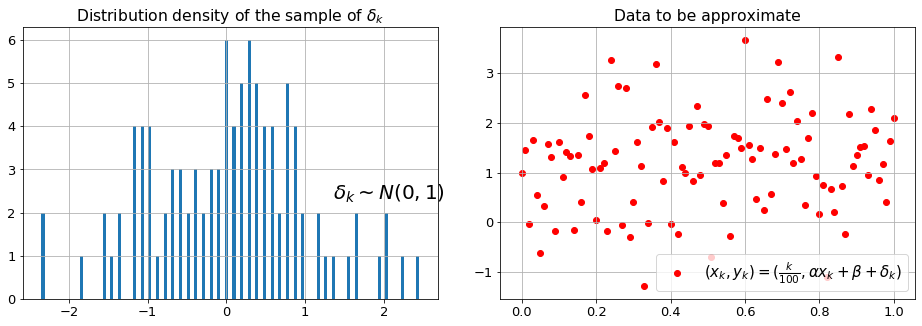

In [193]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Visualization - just to understand the correctness of further results

mpl.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (16, 5))
plt.subplots_adjust(wspace = 0.15)

np.random.seed(4) #23
el_num = 101
mu, sigma = 0, 1
delta_arr = np.random.normal(mu, sigma, el_num)

plt.subplot(1, 2, 1)
plt.hist(delta_arr, bins = 50, rwidth = 0.4)
plt.text(x = 1.35, y = 2.3, s = r'$\delta_k \sim N(0, 1)$', fontsize = 20)
plt.title('Distribution density of the sample of $\delta_k$')
plt.grid()

x_arr = np.linspace(0, 1, el_num)
alpha, beta = np.random.random(), np.random.random()
y_arr = alpha * x_arr + beta * np.ones(el_num) + delta_arr

plt.subplot(1, 2, 2)
plt.scatter(x_arr, y_arr, c = 'r')
plt.title('Data to be approximate')
plt.legend([r'$(x_k, y_k) = (\frac{k}{100}, \alpha x_k + \beta + \delta_k)$'], loc = 'lower right', fontsize = 15)
plt.grid()
plt.show()

fig.savefig('initial_distribution.png')

23.870109879283937 2.095094557346175 36857.56796526677
23.809454122677415 2.320146283225913 1203.5400549758542
23.397991296858052 3.735150008630752 4910.352426380419
22.862892727897165 4.979182645835108 2471.406148540499
21.821474473558947 6.822942138897964 2298.5502959269124
20.147350689429466 8.934356221302362 1715.5476527833157
17.379672951684213 11.398120335857378 1401.6568922594754
13.269431390928535 13.817751182912545 1036.8120713919848
8.189634886768737 15.581044000505505 597.7074334884915
4.254119922478791 16.166689915597658 166.7314681113307
3.0733091744590704 16.10668008684431 10.0378501903634
3.0003237673788705 15.964520519053334 0.2982970770553095
2.9957933816507047 15.82600510671289 0.260286516647227
3.418682386262522 28.947315029320684 16.795611040743438
9.97451518588279 33.35450019593884 157.80647288985094
3.714215571374048 33.810393658593405 153.5259501525688
3.3086065959627358 33.71427743321068 0.6477224496691747
3.302117790068708 33.61136520472264 0.07306126506981059


C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars


,exhaustive search,coordinate descent method,Nelder Mead method,gradient descent method,conjugate gradient descent method,Newton's method,Levenberg-Marquardt alghorithm
a,1.012,1.011,1.012,NaN,1.0,1.0,1.0
b,-0.285,-0.285,-0.285,NaN,1.0,1.0,1.0
nfev,7834402.000,3528.000,129.000,256.0,1.0,1.0,1.0
nit,7834402.000,229.000,68.000,43.0,1.0,1.0,1.0


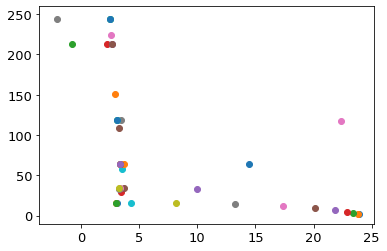

In [204]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar

global x_arr
global y_arr

def least_squares_linear(args):                                 # two-variable func to minimaize
    return np.sum(np.square(args[0] * x_arr + args[1] - y_arr))


def least_squares_rational(args):                               # two-variable func to minimaize 
    return np.sum(np.square(args[0] / (1 + args[1] * x_arr) - y_arr))


def gradient(func, args, eps = 1e-5):                           # value of gradient of func at the point args = [a, b]
    
    a_arg, b_arg = args[0], args[1]
    
    part_deriv_a = (func([a_arg + eps, b_arg]) - func([a_arg - eps, b_arg])) / (2 * eps)
    part_deriv_b = (func([a_arg, b_arg + eps]) - func([a_arg, b_arg - eps])) / (2 * eps)

    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(part_deriv_a, n_digits),  round(part_deriv_b, n_digits)])


def hessian(func, args, eps = 1e-5):                            # value of hessian of func at the point args = [a, b]
    
    a_arg, b_arg = args[0], args[1]
    
    func_ab = func([a_arg, b_arg])
    func_a_eps_b = func([a_arg + eps, b_arg])
    func_a_b_eps = func([a_arg, b_arg + eps])
    
    part_deriv_aa = (func_a_eps_b - 2 * func_ab + func([a_arg - eps, b_arg])) / (eps ** 2)
    part_deriv_bb = (func_a_b_eps - 2 * func_ab + func([a_arg, b_arg - eps])) / (eps ** 2)
    part_deriv_ab = (func([a_arg + eps, b_arg + eps]) - func_a_eps_b - func_a_b_eps + func_ab) / (eps ** 2)
    
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([[round(part_deriv_aa, n_digits), round(part_deriv_ab, n_digits)],\
            [round(part_deriv_ab, n_digits), round(part_deriv_bb, n_digits)]])


def gradient_descent(func, initial_approx = [0, 0], eps = 1e-3):
    
    func_eval_num, iter_num = 0, 0
    args_prev = np.array(initial_approx)
    args_curr = args_prev - np.dot(gradient(func, args_prev), 0.1)
    
    #cond = abs(func(args_curr) - func(args_prev))
    
    func_eval_num += 4
    iter_num += 1
    
    while (np.linalg.norm(args_curr - args_prev, np.inf) >= eps) and (iter_num < 1000):
    #while (cond >= eps) and (iter_num < 1000):
            
        grad_func_prev = gradient(func, args_prev)
        grad_func_curr = gradient(func, args_curr)
        
        beta = np.dot(args_curr - args_prev, grad_func_curr - grad_func_prev) \
        / np.square(np.linalg.norm(grad_func_curr - grad_func_prev))
        
        args_prev =  np.array(args_curr)
        args_curr = args_prev - np.dot(gradient(func, args_prev), beta)
        
        cond = abs(func(args_curr) - func(args_prev))
        print(args_curr[0], args_curr[1], cond)
        
        plt.scatter(args_curr[0], args_curr[1])
        
        func_eval_num +=  6
        iter_num += 1
    
    n_digits = abs(int(round(np.log10(eps))))

    return np.array([round(args_curr[0], n_digits), round(args_curr[1], n_digits), int(func_eval_num), int(iter_num)])


def conjugate_gradient_descent(func, initial_approx = [0, 0], eps = 1e-3):
    return np.ones(4)


def Newtons_method(func, initial_aprox = [0, 0], eps = 1e-3):
    return np.ones(4)
                   
                   
def Levenberg_Marquardt(func, initial_aprox = [0, 0], eps = 1e-3):
    return np.ones(4)


# Pushing in DataFrame results from this and previous laboratory works

x_arr = np.load('x_arr.npy')
y_arr = np.load('y_arr.npy')

df_lin = pd.read_csv('Linear_approx_lab_2.csv', index_col = 0)
df_rat = pd.read_csv('Rational_approx_lab_2.csv', index_col = 0)

algos_dict = {'gradient descent method': gradient_descent, 'conjugate gradient descent method': conjugate_gradient_descent, \
              "Newton's method": Newtons_method, 'Levenberg-Marquardt alghorithm': Levenberg_Marquardt}

for alg_name in algos_dict.keys():
    
    #df_lin[alg_name] = algos_dict[alg_name](least_squares_linear)
    df_rat[alg_name] = algos_dict[alg_name](least_squares_rational)
    
df_rat

In [198]:
# -*- coding: utf-8 -*-

import numpy as np
from scipy.sparse.linalg import cg
import tensorflow as tf
import time


def conjugate_grad(A, b, x=None):
    """
    Description
    -----------
    Solve a linear equation Ax = b with conjugate gradient method.
    Parameters
    ----------
    A: 2d numpy.array of positive semi-definite (symmetric) matrix
    b: 1d numpy.array
    x: 1d numpy.array of initial point
    Returns
    -------
    1d numpy.array x such that Ax = b
    """
    n = len(b)
    if not x:
        x = np.ones(n)
    r = np.dot(A, x) - b
    p = - r
    r_k_norm = np.dot(r, r)
    for i in range(2*n):
        Ap = np.dot(A, p)
        alpha = r_k_norm / np.dot(p, Ap)
        x += alpha * p
        r += alpha * Ap
        r_kplus1_norm = np.dot(r, r)
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        if r_kplus1_norm < 1e-5:
            print('Itr:', i)
            break
        p = beta * p - r
    return x

# x_ph = tf.placeholder('float32', [None, None])
# r = tf.matmul(A, x_ph) - b

if __name__ == '__main__':
    n = 1000
    P = np.random.normal(size=[n, n])
    A = np.dot(P.T, P)
    b = np.ones(n)

    t1 = time.time()
    print('start')
    x = conjugate_grad(A, b)
    t2 = time.time()
    print(t2 - t1)
    x2 = np.linalg.solve(A, b)
    t3 = time.time()
    print(t3 - t2)
    x3 = cg(A, b)
    t4 = time.time()
    print(t4 - t3)

    # print np.dot(A, x) - b

start
Itr: 1887
0.2634105682373047
0.026978254318237305
0.37822556495666504


0.3999999999999999 2.2799999999999994 8.47
-0.040000000000000036 0.9248 1.3551999999999995
-0.216 0.707968 0.2168319999999999
-0.2864 0.67327488 0.03469312000000002
-0.31456 0.6677239808 0.00555089920000007
-0.32582400000000006 0.666835836928 0.0008881438719999801
-0.33032959999999995 0.66669373390848 0.00014210301952000126
-0.3321318399999999 0.6666709974253568 2.2736483123120266e-05


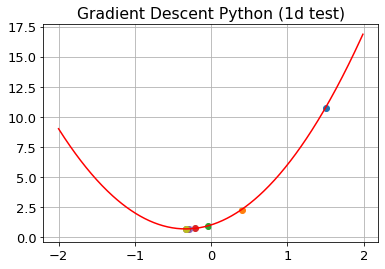

In [116]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np

def fonction(x):
    return 3*x*x+2*x+1

x = np.arange(-2.0, 2.0, 0.01)
y = fonction(x)

plt.plot(x, y,'r-')
#plt.show()

alpha = 0.1 # learning rate
nb_max_iter = 100 # Nb max d'iteration
eps = 0.0001 # stop condition

x0 = 1.5 # start point
y0 = fonction(x0)
plt.scatter(x0, fonction(x0))

cond = eps + 10.0 # start with cond greater than eps (assumption)
nb_iter = 0 
tmp_y = y0
while cond > eps and nb_iter < nb_max_iter:
    x0 = x0 - alpha * misc.derivative(fonction, x0)
    y0 = fonction(x0)
    nb_iter = nb_iter + 1
    cond = abs( tmp_y - y0 )
    tmp_y = y0
    print(x0,y0,cond)
    plt.scatter(x0, y0)

plt.title("Gradient Descent Python (1d test)")
plt.grid()

plt.savefig("gradient_descent_1d_python.png", bbox_inches='tight')
plt.show()

0.9922451584331851 1.4883677376515123 0.0019965988202887003
0.9841542313323145 1.476231347000033 0.0021749024122583033
0.9757011910735821 1.4635517866122814 0.0023756594601382283
0.9668571684235951 1.4502857526388622 0.002602502453102104
0.9575900607860779 1.4363850911822393 0.0028597775959505814
0.9478640773611926 1.4217961160456052 0.0031527082540723783
0.9376392103414557 1.4064588155163467 0.0034876004526735727
0.9268706195491158 1.3903059293297448 0.003872102085675372
0.9155079162444643 1.3732618743758902 0.00431553073172742
0.9034943302170936 1.3552414953383036 0.004829288994349992
0.8907657432416912 1.3361486148769348 0.005427391035746215
0.8772495720351233 1.3158743580702055 0.006127129297499534
0.8628634862229275 1.2942952293557282 0.006949915548732366
0.8475139533087724 1.2712709299893528 0.007922333734396783
0.8310946165269025 1.2466419248200173 0.009077439979765872
0.8134845379551411 1.220226806963069 0.010456330208778189
0.7945463870590438 1.1918195806223926 0.0121099539467

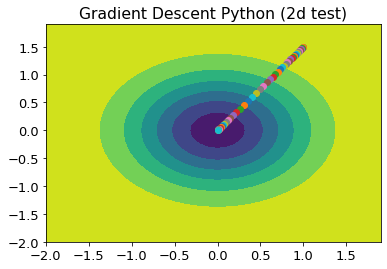

In [177]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np
import math

#----------------------------------------------------------------------------------------#
# Function

def fonction(x1,x2):
    return - 1.0 * math.exp(-x1**2 - x2**2);

#def fonction(a, b):
#    return np.sum(np.square(a * x_arr + b - y_arr))

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)

#----------------------------------------------------------------------------------------#
# Plot Function

x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)

xx1,xx2 = np.meshgrid(x1,x2);

z = - 1.0 * np.exp(-xx1**2 - xx2**2);

h = plt.contourf(x1,x2,z)
#plt.show()

#----------------------------------------------------------------------------------------#
# Gradient Descent

alpha = 0.1 # learning rate
nb_max_iter = 100 # Nb max d'iteration
eps = 0.0001 # stop condition

x1_0 = 1 # start point
x2_0 = 1.5 
z0 = fonction(x1_0,x2_0)
plt.scatter(x1_0,x2_0)

cond = eps + 10.0 # start with cond greater than eps (assumption)
nb_iter = 0 
tmp_z0 = z0
while cond > eps and nb_iter < nb_max_iter:
    tmp_x1_0 = x1_0 - alpha * partial_derivative(fonction, 0, [x1_0,x2_0])
    tmp_x2_0 = x2_0 - alpha * partial_derivative(fonction, 1, [x1_0,x2_0])
    x1_0 = tmp_x1_0
    x2_0 = tmp_x2_0
    z0 = fonction(x1_0,x2_0)
    nb_iter = nb_iter + 1
    cond = abs( tmp_z0 - z0 )
    tmp_z0 = z0
    print(x1_0,x2_0,cond)
    plt.scatter(x1_0, x2_0)

plt.title("Gradient Descent Python (2d test)")

plt.savefig("gradiend_descent_2d_python.png", bbox_inches='tight')
plt.show()

30
0.29999999995311555 0.9000000000559112 0.1000000000139778 2.340000000077575
0.5399999999600169 1.220000000065113 0.18000000001627825 1.4976000000227647
0.7319999999921833 1.4760000000191837 0.2440000000270004 0.9584639999407663
0.8856000000001529 1.680800000000204 0.29520000002225544 0.6134169599685317
1.0084799999976468 1.844639999989461 0.3361600000140186 0.3925868543788288
1.1067839999878704 1.9757119999819768 0.36892800001075976 0.25125558680191606
1.18542719998449 2.080569599973769 0.39514240000593226 0.16080357555733926
1.248341759982341 2.1644556799894072 0.4161139200042907 0.10291428837507477
1.298673407981732 2.231564544001085 0.4328911360040877 0.0658651445593459
1.3389387263820773 2.2852516352084846 0.44631290880281504 0.04215369251658539
1.3711509811026312 2.3282013081731554 0.4570503270420745 0.0269783632098496
1.3969207848803233 2.362561046543296 0.4656402616331351 0.01726615245382028
1.417536627902269 2.390048837238645 0.47251220930619175 0.011050337570072614
1.434029

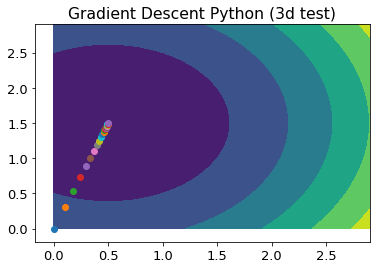

In [165]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np
import math

#----------------------------------------------------------------------------------------#
# Function

global x1_sphere 
global x2_sphere 
global x3_sphere

x1_sphere = 1.5
x2_sphere = 2.5
x3_sphere = 0.5

def fonction(x1,x2,x3):
    r1 = x1 - x1_sphere
    r2 = x2 - x2_sphere
    r3 = x3 - x3_sphere
    return r1*r1 + r2*r2 + r3*r3 ;

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)

#----------------------------------------------------------------------------------------#
# Plot Function

x1 = np.arange(0.0, 3.0, 0.1)
x2 = np.arange(0.0, 3.0, 0.1)
x3 = np.arange(0.0, 3.0, 0.1)

dim_x1 = x1.shape[0]
dim_x2 = x2.shape[0]
dim_x3 = x3.shape[0]

print(dim_x1)

z2 = np.zeros((dim_x1,dim_x2))
z3 = np.zeros((dim_x1,dim_x3))

for i in np.arange(dim_x1):
    for j in np.arange(dim_x2):
        r1 = x1[i] - x1_sphere
        r2 = x2[j] - x2_sphere
        r3 = 0.0   - x3_sphere
        z2[i,j] = r1*r1 + r2*r2 + r3*r3

h = plt.contourf(x1,x2,z2)
plt.savefig("gradient_descent_3d_python_x1_x2", bbox_inches='tight')
plt.close()

for i in np.arange(dim_x1):
    for j in np.arange(dim_x3):
        r1 = x1[i] - x1_sphere
        r2 = 0.0   - x2_sphere
        r3 = x3[j] - x3_sphere
        z3[i,j] = r1*r1 + r2*r2 + r3*r3

h = plt.contourf(x1,x3,z3)
plt.savefig("gradient_descent_3d_python_x1_x3", bbox_inches='tight')

#----------------------------------------------------------------------------------------#
# Gradient Descent

alpha = 0.1 # learning rate
nb_max_iter = 100 # Nb max d'iteration
eps = 0.0001 # stop condition

x1_0 = 0.0 # start point
x2_0 = 0.5 
x3_0 = 0.0 
z0 = fonction(x1_0,x2_0,x3_0)
plt.scatter(x1_0,x3_0)

cond = eps + 10.0 # start with cond greater than eps (assumption)
nb_iter = 0 
tmp_z0 = z0
while cond > eps and nb_iter < nb_max_iter:
    tmp_x1_0 = x1_0 - alpha * partial_derivative(fonction, 0, [x1_0,x2_0,x3_0])
    tmp_x2_0 = x2_0 - alpha * partial_derivative(fonction, 1, [x1_0,x2_0,x3_0])
    tmp_x3_0 = x3_0 - alpha * partial_derivative(fonction, 2, [x1_0,x2_0,x3_0])
    x1_0 = tmp_x1_0
    x2_0 = tmp_x2_0
    x3_0 = tmp_x3_0
    z0 = fonction(x1_0,x2_0,x3_0)
    nb_iter = nb_iter + 1
    cond = abs( tmp_z0 - z0 )
    tmp_z0 = z0
    print(x1_0,x2_0,x3_0,cond)
    plt.scatter(x3_0, x1_0)

plt.title("Gradient Descent Python (3d test)")

plt.savefig("gradient_descent_23_python.png", bbox_inches='tight')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

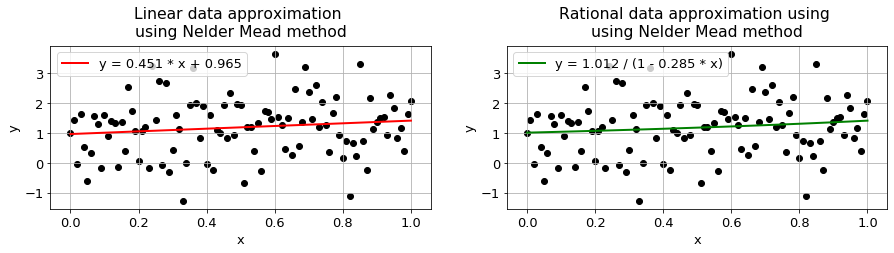

In [199]:
# Vizualization - as it should be

fig, ax = plt.subplots(figsize = (15, 30))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

for i in range (2, 4):
    
    a_lin, b_lin = round(df_lin[df_lin.columns[i]]['a'], 3), round(df_lin[df_lin.columns[i]]['b'], 3)
    a_rat, b_rat = round(df_rat[df_rat.columns[i]]['a'], 3), round(df_rat[df_rat.columns[i]]['b'], 3)

    plt.subplot(7, 2, 2 * i + 1)
    plt.scatter(x_arr, y_arr, c = 'k')
    plt.plot(x_arr, a_lin * x_arr + b_lin, c = 'r', linewidth = 2)

    plt.title('Linear data approximation \n' + 'using ' + df_lin.columns[i], pad = 10)
    plt.legend(['y = {0} * x + {1}'.format(a_lin, b_lin)], loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

    plt.subplot(7, 2, 2 * i + 2)
    plt.scatter(x_arr, y_arr, c = 'k')
    plt.plot(x_arr, a_rat / (1 + x_arr * b_rat), c = 'g', linewidth = 2)

    plt.title('Rational data approximation using \n' + 'using ' + df_lin.columns[i], pad = 10)
    plt.legend(['y = {0} / (1 - {1} * x)'.format(a_rat, abs(b_rat))], loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

plt.show()
fig.savefig('approx_result.png')